In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from utils import *

2023-05-10 23:31:04.861829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 23:31:05.792249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [29]:
f = open("partial_data.csv", "r")

x = []
y = []

for line in f.readlines():
    sequence = line.split(",")

    sequence = [int(x) for x in sequence]

    for i in range(len(sequence)-10):
        x.append(sequence[i:i+10])
        y.append(sequence[i+10])

f.close()

x = np.array(x)

y = np.array(y)

In [30]:
num = len(y)

idx = np.random.permutation(num)

x = x[idx]
y = y[idx]

x = x.reshape((x.shape[0], x.shape[1], 1))

n_classes = len(np.unique(y))

print(np.unique(y))

print(n_classes)

x_train, y_train, x_val, y_val, x_test, y_test = split_and_shuffle(x, y)

[0 1 2 3 4 5 6 7 8 9]
10


In [35]:

def LSTM_Model(input_shape, dropout=0, units=2048):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    # Long Short Term Memory layer
    x = layers.LSTM(units, dropout=dropout)(x)
    # Output layer
    outputs = layers.Dense(n_classes,activation='softmax')(x)
    return keras.Model(inputs, outputs)

In [36]:
input_shape = x.shape[1:]

model = LSTM_Model(
    input_shape
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["sparse_categorical_accuracy"]
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)]

results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    #validation_split=0.2,
    epochs=400,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_9 (LSTM)               (None, 2048)              16793600  
                                                                 
 dense_7 (Dense)             (None, 10)                20490     
                                                                 
Total params: 16,814,090
Trainable params: 16,814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400


2023-05-10 23:40:09.335290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 23:40:09.336934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 23:40:09.338610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

15/15 [==============================] - ETA: 0s - loss: 2.4426 - sparse_categorical_accuracy: 0.1125

2023-05-10 23:40:13.045258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 23:40:13.047868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 23:40:13.049614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

15/15 [==============================] - 4s 169ms/step - loss: 2.4426 - sparse_categorical_accuracy: 0.1125 - val_loss: 2.2986 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/400
15/15 [==============================] - 2s 116ms/step - loss: 2.2695 - sparse_categorical_accuracy: 0.1333 - val_loss: 2.4855 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/400
15/15 [==============================] - 2s 123ms/step - loss: 2.2230 - sparse_categorical_accuracy: 0.1458 - val_loss: 2.2104 - val_sparse_categorical_accuracy: 0.2000
Epoch 4/400
15/15 [==============================] - 2s 126ms/step - loss: 2.1426 - sparse_categorical_accuracy: 0.1625 - val_loss: 2.1677 - val_sparse_categorical_accuracy: 0.2667
Epoch 5/400
15/15 [==============================] - 2s 123ms/step - loss: 2.1252 - sparse_categorical_accuracy: 0.1583 - val_loss: 2.1175 - val_sparse_categorical_accuracy: 0.1333
Epoch 6/400
15/15 [==============================] - 2s 125ms/step - loss: 2.0547 - sparse_categorical_accu

[0.04164504632353783, 0.9666666388511658]

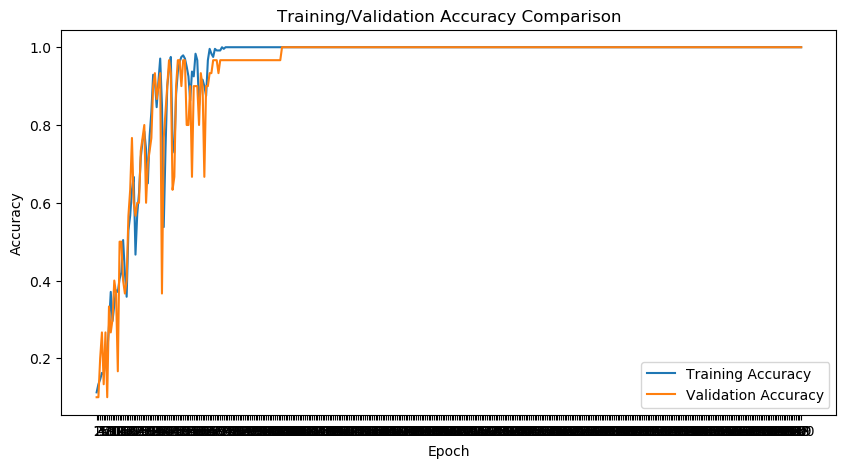

In [37]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

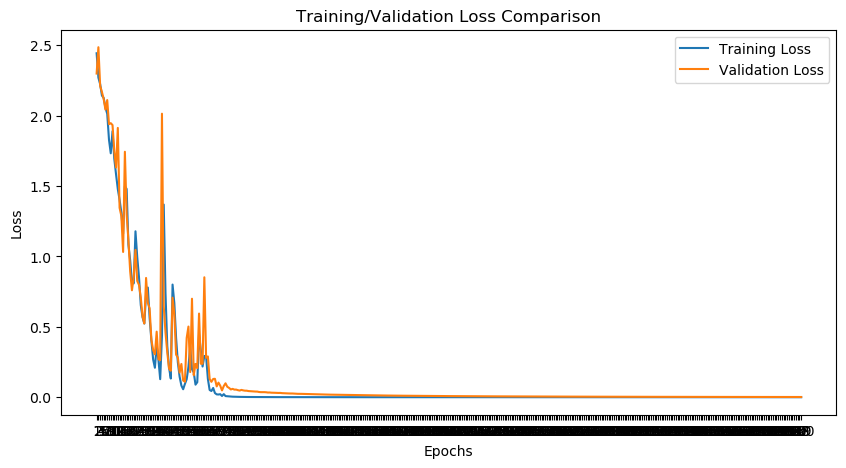

In [38]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"])

1/1 [==============================] - 0s 374ms/step


2023-05-10 23:55:05.348260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-10 23:55:05.349965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-10 23:55:05.351438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

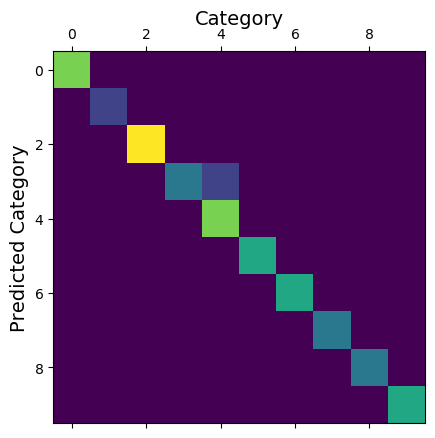

In [39]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
plot_confusion_matrix(y_test, y_pred)

In [45]:
#model.predict(np.array(x[0,:,:]))

TypeError: in user code:

    File "/home/miglou/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/miglou/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/miglou/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/miglou/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/miglou/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/miglou/.local/lib/python3.8/site-packages/keras/layers/rnn/lstm.py", line 615, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_9' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_9' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [47]:
#a = np.array([0,1,0,0,1,0,0,1,0,0])
#a = np.array([1,1,0,1,1,0,1,1,0,1])
#a = np.array([2,2,0,2,2,1,2,2,3,2])
a = np.array([7,7,0,7,7,3,7,7,6,7])

a = a.reshape((1, a.shape[0],1))

print(a.shape)

model.predict(a)

(1, 10, 1)
1/1 [==============================] - 0s 32ms/step


array([[1.4893131e-13, 2.9754008e-14, 2.4884151e-12, 3.7825039e-14,
        1.4101879e-13, 5.8453677e-09, 1.5942665e-06, 9.9999475e-01,
        3.6810329e-06, 2.4790398e-12]], dtype=float32)

In [48]:
model.save('../models/lstm_numbers')

2023-05-11 00:00:36.646154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-11 00:00:36.648863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-11 00:00:36.650526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: ../models/lstm_numbers/assets


INFO:tensorflow:Assets written to: ../models/lstm_numbers/assets


In [ ]:
model = tf.keras.models.load_model('../models/lstm_numbers')

2023-05-10 22:55:17.241806: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-10 22:55:17.419390: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-10 22:55:17.420150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
#a = np.array([0,1,0,0,1,0,0,1,0,0])
#a = np.array([1,1,0,1,1,0,1,1,0,1])
#a = np.array([2,2,0,2,2,1,2,2,3,2])
#a = np.array([9,9,0,9,9,1,9,9,3,9])

#a = a.reshape((1, a.shape[0]))

#model.predict(a)